Lasso and Ridge Regression

Linear Regression with regularization (L1 and L2). Regularizationis used to reduse overfitting.

In [ ]:
import pandas as pd 
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Reading file

In [ ]:
df=pd.read_excel('Hitters.xlsx')

Seperating rows with Salary as null

In [ ]:
df=df.fillna(-1)
df1, df2 = [x for _, x in df.groupby(df['Salary'] ==-1)]

In [ ]:
df2=df2.replace(-1,np.nan)

Heatmap of correlation marix

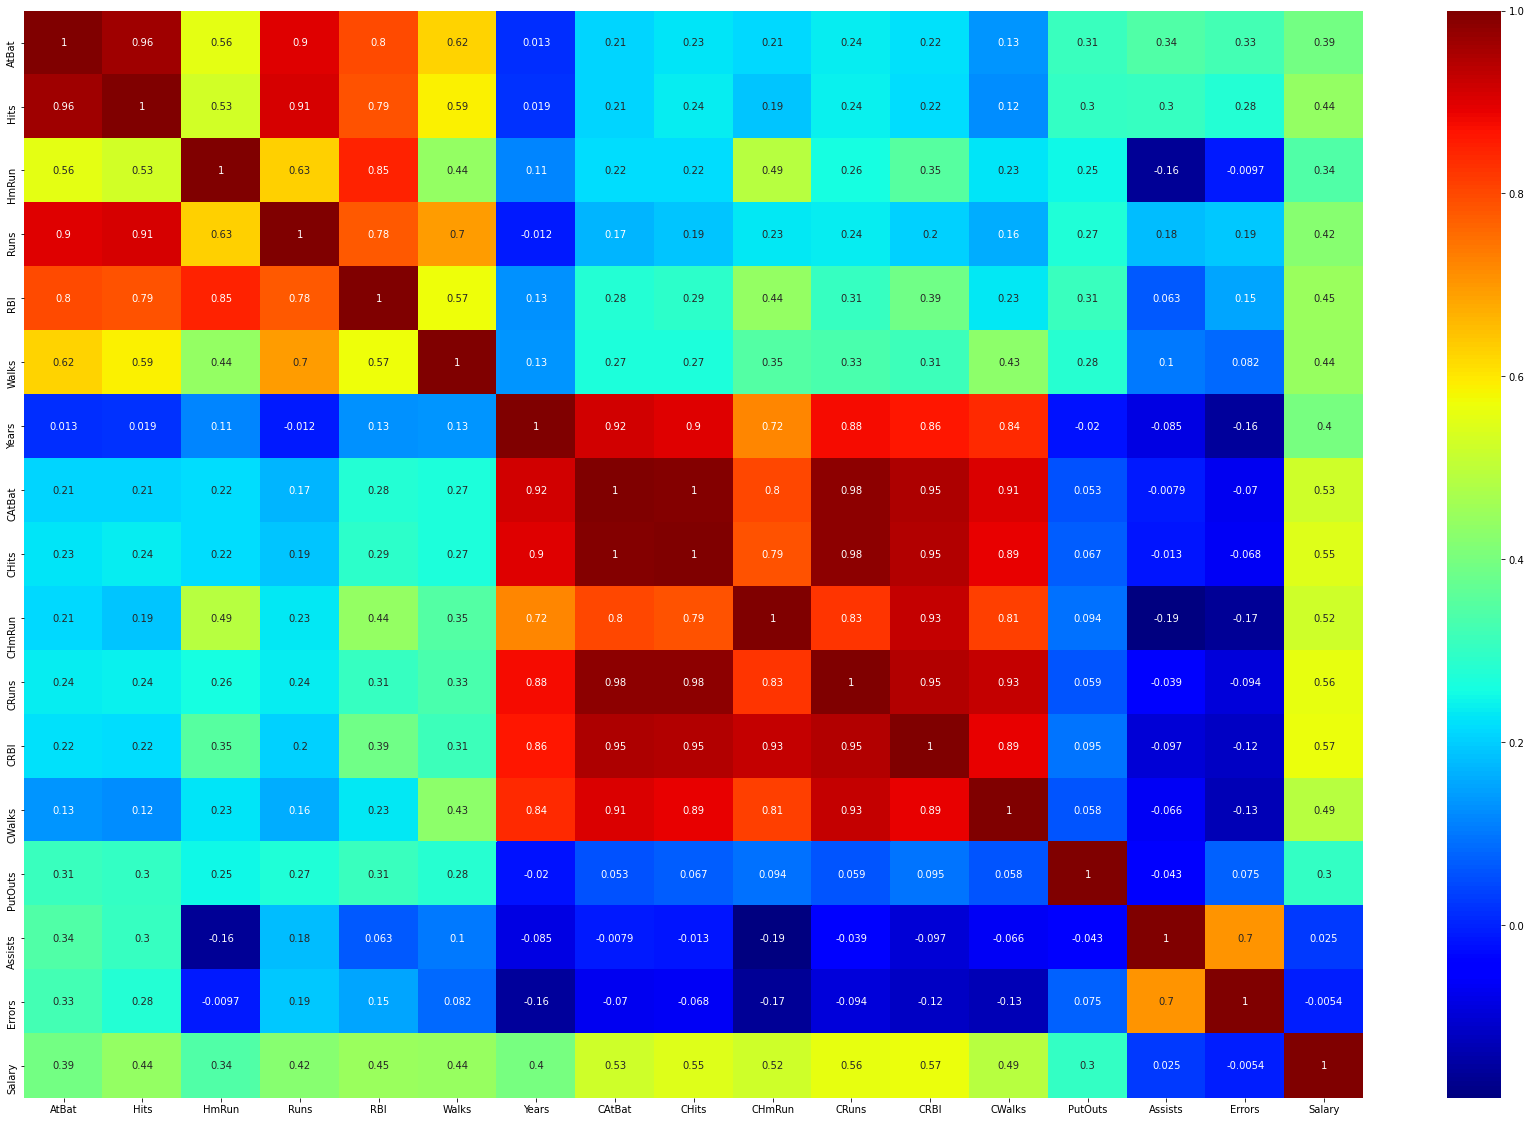

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(df1.corr(),annot = True,cmap="jet")

Disribution of diffent labels

<Figure size 720x720 with 0 Axes>

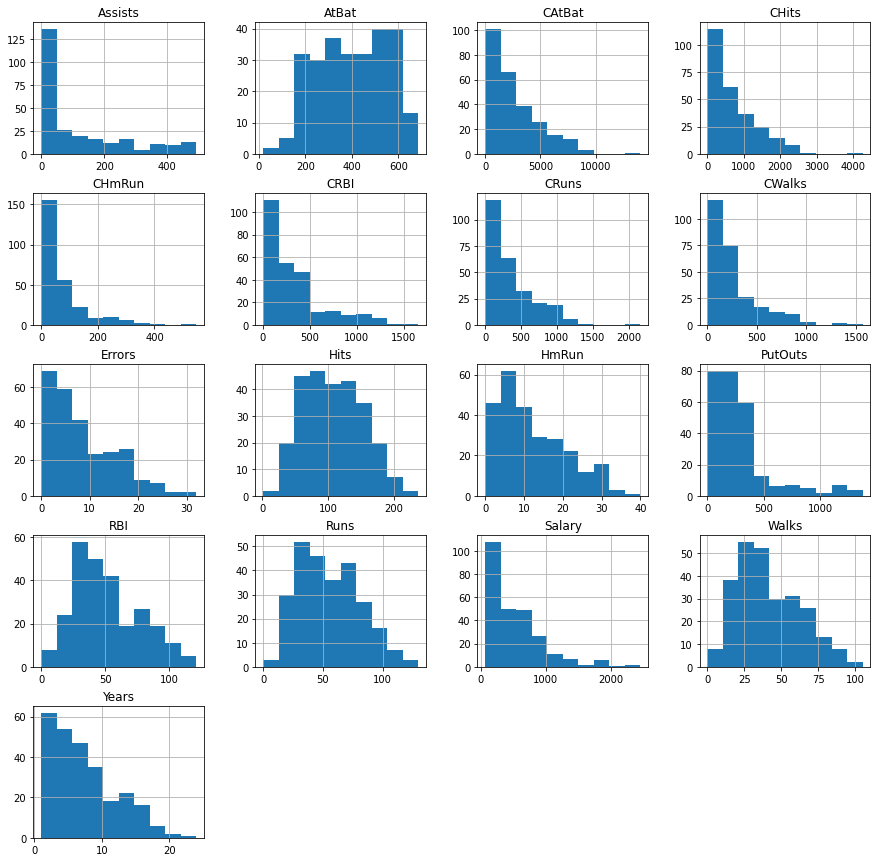

In [ ]:
plt.figure(figsize=(10,10))
df1.hist(figsize=(15,15))
plt.show()

most of them are skewed so need to normalize



In [ ]:
df1.corrwith(df1.Salary).sort_values(ascending=False)

Salary     1.000000
CRBI       0.566966
CRuns      0.562678
CHits      0.548910
CAtBat     0.526135
CHmRun     0.524931
CWalks     0.489822
RBI        0.449457
Walks      0.443867
Hits       0.438675
Runs       0.419859
Years      0.400657
AtBat      0.394771
HmRun      0.343028
PutOuts    0.300480
Assists    0.025436
Errors    -0.005401
dtype: float64

Scatter plot of most correlated values

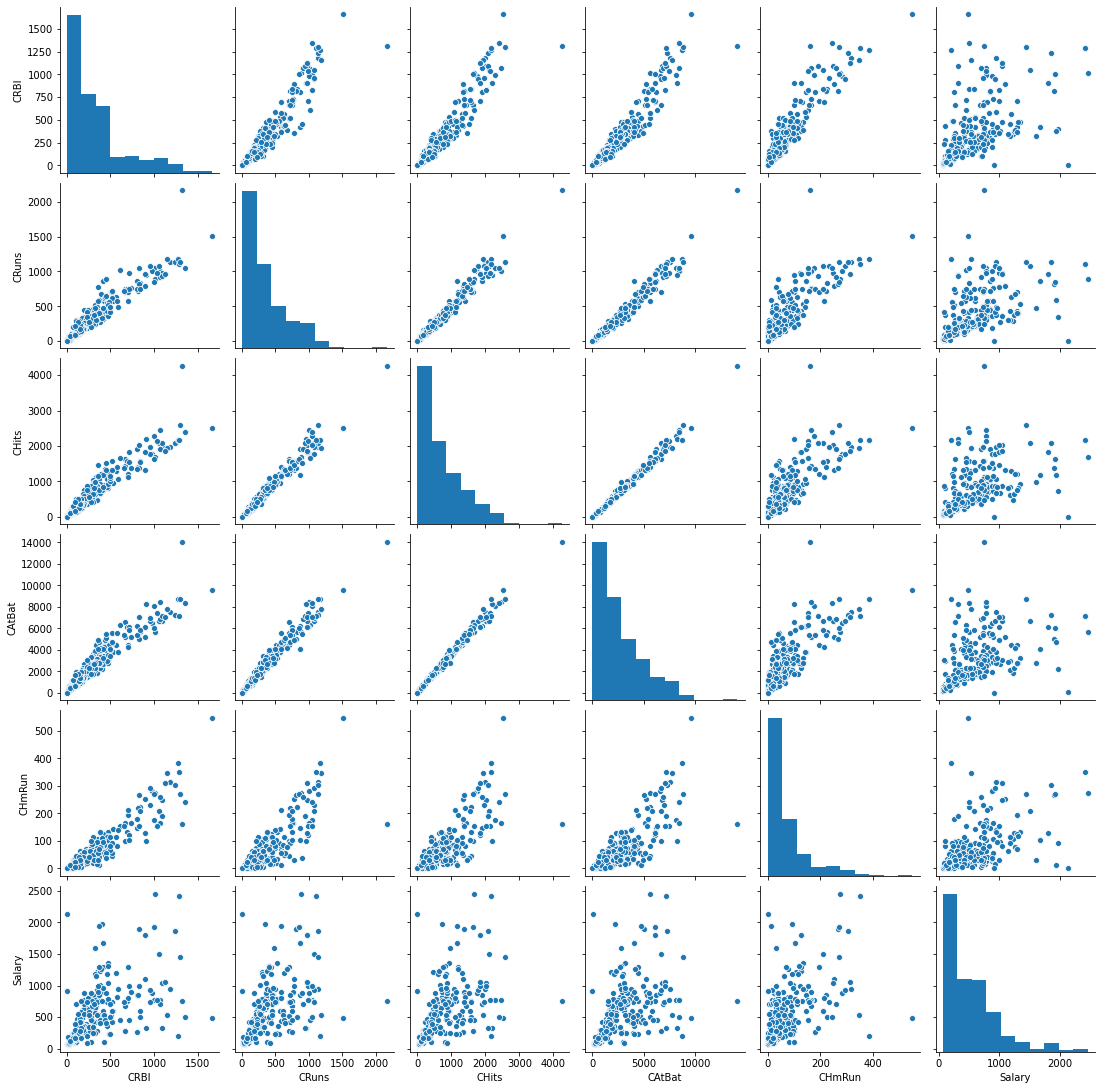

In [ ]:
c=['CRBI','CRuns','CHits','CAtBat','CHmRun','Salary']
sns.pairplot(df1[c])

Most of the values have inter-correlation and the graph with salary is more diverse.

Handling object type data

In [ ]:
df1.League=df1.League.replace('N',1)
df1.League=df1.League.replace('A',2)
df2.League=df2.League.replace('N',1)
df2.League=df2.League.replace('A',2)

In [ ]:
df1.NewLeague=df1.NewLeague.replace('N',1)
df1.NewLeague=df1.NewLeague.replace('A',2)
df2.NewLeague=df2.NewLeague.replace('N',1)
df2.NewLeague=df2.NewLeague.replace('A',2)

In [ ]:
df1.Division=df1.Division.replace('W',1)
df1.Division=df1.Division.replace('E',2)
df2.Division=df2.Division.replace('W',1)
df2.Division=df2.Division.replace('E',2)

In [ ]:
cols = [col for col in df.columns if col not in ["Salary"]]
X = df1[cols]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df1['Salary'], test_size=0.25)

Ridge Regression uses L2 regularization and penalizes the weights

In [ ]:
from sklearn.linear_model import Ridge
rid = Ridge(normalize=True)
rid.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
rid.score(X_train,y_train)

0.43399537437145097

In [ ]:
rid.score(X_test,y_test)

0.5263798697275235

In [ ]:
rid.coef_

array([ 7.57376029e-02,  8.01521177e-01,  7.40717209e-01,  9.98604699e-01,
        1.07038172e+00,  1.90501378e+00,  2.09133885e+00,  9.41189137e-03,
        4.77396945e-02,  3.26372281e-01,  9.00073922e-02,  1.05706616e-01,
        5.29270520e-02, -2.48358984e+01,  7.65926274e+01,  1.47797880e-01,
       -2.88271454e-02, -1.14388675e+00, -1.27598350e+01])

 The coef in ridge tend to zero for low correlated features

1.   List item
2.   List item



Lasso uses L1 regularization

In [ ]:
from sklearn.linear_model import Lasso
las = Lasso(normalize=True)
las.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [ ]:
las.score(X_train,y_train)

0.4662700247509457

In [ ]:
las.score(X_test,y_test)

0.53265415747286

In [ ]:
las.coef_

array([-0.00000000e+00,  1.69879583e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.48642096e+00, -0.00000000e+00,  0.00000000e+00,
        4.84928277e-02,  0.00000000e+00,  0.00000000e+00,  4.54010805e-01,
       -0.00000000e+00, -1.76676732e+01,  1.22874139e+02,  2.28884054e-01,
       -0.00000000e+00, -1.56843386e+00, -0.00000000e+00])

Lasso will make the coef of least correlated features zero. Sometimes also used for feature selection.

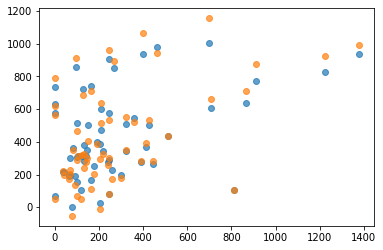

In [ ]:
plt.scatter(df2["PutOuts"],rid.predict(df2[cols]),alpha=0.7)
plt.scatter(df2["PutOuts"],las.predict(df2[cols]),alpha=0.7)

Lasso and Ridge differ more for large values of Salary

Since the correlation of features with salary are considerably less the accuracies of models are less